starting preprocessing...
...preprocessing completed
starting vectorizing words...
...words vectorized


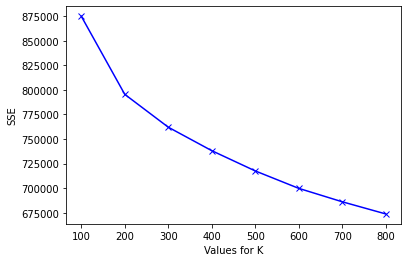

In [1]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt
from preprocessing import Preprocessing
import numpy as np
import tfidf

prp = Preprocessing()
df = prp.main()
df = Preprocessing.preprocess(df)
df = df['text']
ntf = tfidf.TFIDF(df)
X = ntf.df_tfidf_vectorize(df)
sse={}


for k in np.arange(100,900,100):
    kmeans = KMeans(n_clusters=k, max_iter=800).fit(X)
    sse[k] = kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()), 'bx-')
plt.xlabel('Values for K')
plt.ylabel('SSE')
plt.show();

In [2]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=100)
vectoriser.fit_transform(df)
kmeans = KMeans(n_clusters=200)
kmeans.fit(X)
result = pd.concat([df,pd.DataFrame(X.toarray(),columns=vectoriser.get_feature_names())],axis=1)
result['cluster'] = kmeans.predict(X)

/home/annabelle/Documents/TwiiterSentimentAnalysis/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [3]:
result[['text', 'cluster']]

,text,cluster
0,a that a bummer you shoulda got david carr of ...,195
1,is upset that he cant updat his facebook by te...,69
2,i dive mani time for the ball manag to save 50...,25
3,my whole bodi feel itchi and like its on fire,50
4,no its not behav at all im mad why am i here b...,89
...,...,...
1599995,just woke up having no school is the best feel...,124
1599996,thewdbcom very cool to hear old walt interview...,74
1599997,are you readi for your mojo makeov ask me for ...,175
1599998,happi 38th birthday to my boo of alll time tup...,114


In [4]:
clusters = result['cluster'].unique()
labels = []
for i in range(len(clusters)):
    subset = result[result['cluster'] == clusters[i]]
    words = ' '.join([x for x in np.where(subset.all()!=0,subset.columns,None) if x and x!='text' and x!='cluster' and len(x.split()) == 1])
    labels.append(words)
labels_table = pd.DataFrame(zip(clusters,labels),columns=['cluster','label'])
result_labelled = pd.merge(result,labels_table,on='cluster',how='left')

In [5]:
result_labelled[['text', 'cluster', 'label']]

,text,cluster,label
0,a that a bummer you shoulda got david carr of ...,195,do you
1,is upset that he cant updat his facebook by te...,69,as
2,i dive mani time for the ball manag to save 50...,25,for the
3,my whole bodi feel itchi and like its on fire,50,feel like
4,no its not behav at all im mad why am i here b...,89,all
...,...,...,...
1599995,just woke up having no school is the best feel...,124,feel
1599996,thewdbcom very cool to hear old walt interview...,74,to
1599997,are you readi for your mojo makeov ask me for ...,175,for
1599998,happi 38th birthday to my boo of alll time tup...,114,time


In [6]:
pd.pivot_table(result_labelled, index=['label'], values=['text'], aggfunc='count').sort_values(['text'], ascending=False).rename(columns={'text':'count of text'})

,count of text
label,
,94079
go,29788
in the,25519
my,21127
for the,20944
...,...
im oh,2981
in the was,2981
miss too,2361


In [7]:
sil_score = silhouette_score(X, kmeans.labels_)
sil_score

0.04533188939816792

In [9]:
from sklearn.metrics import davies_bouldin_score
davies_bouldin_score(X.toarray(), kmeans.labels_)

3.0072716916735747